In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
error_df = pd.read_csv("results\error.csv")
# ['1M Prediction', '3M Prediction']
error_df.Predition[error_df.Predition == "Next 30D"] = '1M Prediction'
error_df.Predition[error_df.Predition == "Next 90D"] = '3M Prediction'
error_df

C:\Users\THETANG\AppData\Local\Temp\ipykernel_14968\1334029618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df.Predition[error_df.Predition == "Next 30D"] = '1M Prediction'
C:\Users\THETANG\AppData\Local\Temp\ipykernel_14968\1334029618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df.Predition[error_df.Predition == "Next 90D"] = '3M Prediction'


,Model,Predition,%Error,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,A. Lange & Söhne 140.029,1M Prediction,2.891240,NaN,Next 30D,Next 90D
1,A. Lange & Söhne 140.029,1M Prediction,2.953358,max,34.44470758,48.22971643
2,A. Lange & Söhne 140.029,1M Prediction,3.015724,mean,6.604995748,11.74199977
3,A. Lange & Söhne 140.029,1M Prediction,3.063079,NaN,NaN,NaN
4,A. Lange & Söhne 140.029,1M Prediction,3.083076,NaN,NaN,NaN
...,...,...,...,...,...,...
15737,Vacheron Constantin 7900V110A-B334,3M Prediction,29.250224,NaN,NaN,NaN
15738,Vacheron Constantin 7900V110A-B334,3M Prediction,35.803871,NaN,NaN,NaN
15739,Vacheron Constantin 7900V110A-B334,3M Prediction,34.269666,NaN,NaN,NaN
15740,Vacheron Constantin 7900V110A-B334,3M Prediction,34.263465,NaN,NaN,NaN


In [78]:
sns.set_theme(style="ticks", palette="pastel")
pic_path = "results\Error\\"

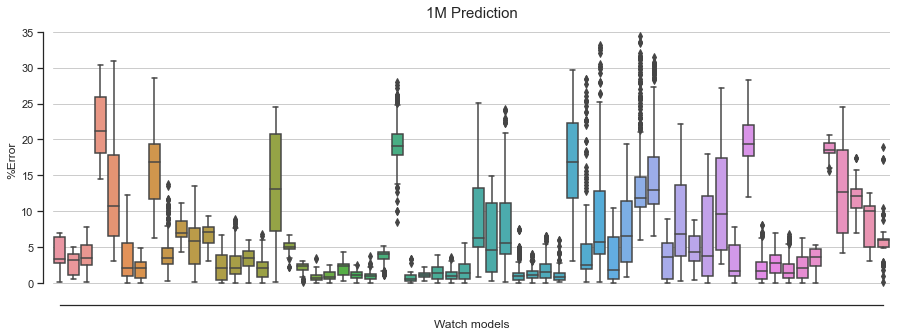

In [79]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.set_theme(style="ticks", palette="pastel")

ax = sns.boxplot(x="Model", y="%Error", data=error_df[error_df.Predition == "1M Prediction"])
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
plt.grid(True, axis='y')
plt.title('1M Prediction', fontsize=15)
plt.xlabel("Watch models")
sns.despine(offset=10, trim=True)
plt.savefig(pic_path+'1M_Prediction.png')


plt.show()

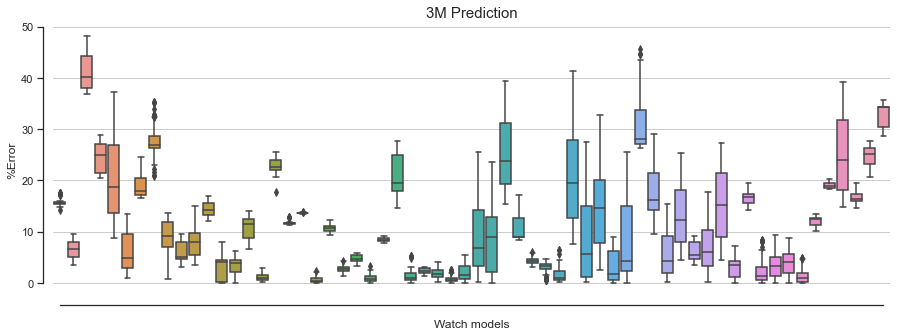

In [80]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.set_theme(style="ticks", palette="pastel")

ax = sns.boxplot(x="Model", y="%Error", data=error_df[error_df.Predition == "3M Prediction"])
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
plt.grid(True, axis='y')
plt.title('3M Prediction', fontsize=15)
plt.xlabel("Watch models")
sns.despine(offset=10, trim=True)
plt.savefig(pic_path+'3M_Prediction.png')


plt.show()

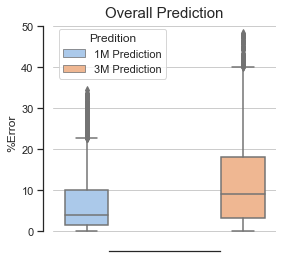

In [81]:
sns.set(rc={'figure.figsize':(4, 4)})
sns.set_theme(style="ticks", palette="pastel")

ax = sns.boxplot(x="Predition", y="%Error", hue="Predition", data=error_df)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
plt.grid(True, axis='y')
plt.title('Overall Prediction', fontsize=15)
sns.despine(offset=10, trim=True)
plt.xlabel(None)
ax.tick_params()
plt.savefig(pic_path+'Overall_Prediction.png')

plt.show()

In [82]:
sum_err = error_df.groupby(['Predition'],0).agg(
    {'%Error':['min', 'mean', 'max']})
sum_err

%Error                      
                    min       mean        max
Predition                                    
1M Prediction  0.001852   6.604996  34.444708
3M Prediction  0.000244  11.742000  48.229716

In [83]:
sum_err = error_df.groupby(['Model', 'Predition'],0).agg(
    {'%Error':['mean']})
sum_err = sum_err.droplevel(1, axis=1)
sum_err = sum_err.reset_index()
sum_err = sum_err.groupby(['Predition'],0).agg(
    {'%Error':['min', 'mean', 'max']})
sum_err = np.round(sum_err, decimals = 2)
sum_err

%Error              
                 min   mean    max
Predition                         
1M Prediction   0.68   6.26  22.02
3M Prediction   0.60  11.31  41.07